In [1]:
%matplotlib inline

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
sampled_training = pd.read_csv('p13-takehome-ml/sampled_training', header = None)
sampled_test = pd.read_csv('p13-takehome-ml/sampled_test', header = None)

In [4]:
sampled_training.columns = ['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']

In [5]:
#decompose year , month, day from hour
sampled_training['year'] = sampled_training['hour'] // 10**6
sampled_training['month'] = sampled_training['hour'] // 10**4 - sampled_training['year'] * 10**2
sampled_training['day'] = sampled_training['hour'] // 10**2 - sampled_training['year'] * 10**4 - sampled_training['month'] * 10**2
sampled_training['adj_hour'] = sampled_training['hour'] - sampled_training['year'] * 10**6 - sampled_training['month'] * 10**4 - sampled_training['day'] * 10**2

In [6]:
sampled_training.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,year,month,day,adj_hour
0,10002028568167339219,0,14102100,1005,0,9e8cf15d,0d3cb7be,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,58811cdf,8326c04b,1,2,20596,320,50,2161,0,35,100148,157,14,10,21,0
1,10006958186789044052,1,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,0acbeaa3,45a51db4,f95efa07,a99f214a,ce6e6bbd,2cd8ff6d,1,0,18993,320,50,2161,0,35,100034,157,14,10,21,0
2,10011650513707909570,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,0f2161f8,a99f214a,1ce4451d,99e427c9,1,0,21611,320,50,2480,3,297,100111,61,14,10,21,0
3,10022961149355219548,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,0f2161f8,bd7c02a1,51197d98,2203a096,1,0,4687,320,50,423,2,39,100148,32,14,10,21,0
4,10029289556764215760,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,1c306e3a,ff065cf0,1,2,15706,320,50,1722,0,35,100084,79,14,10,21,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ec935b8d0>,
      dtype=object)

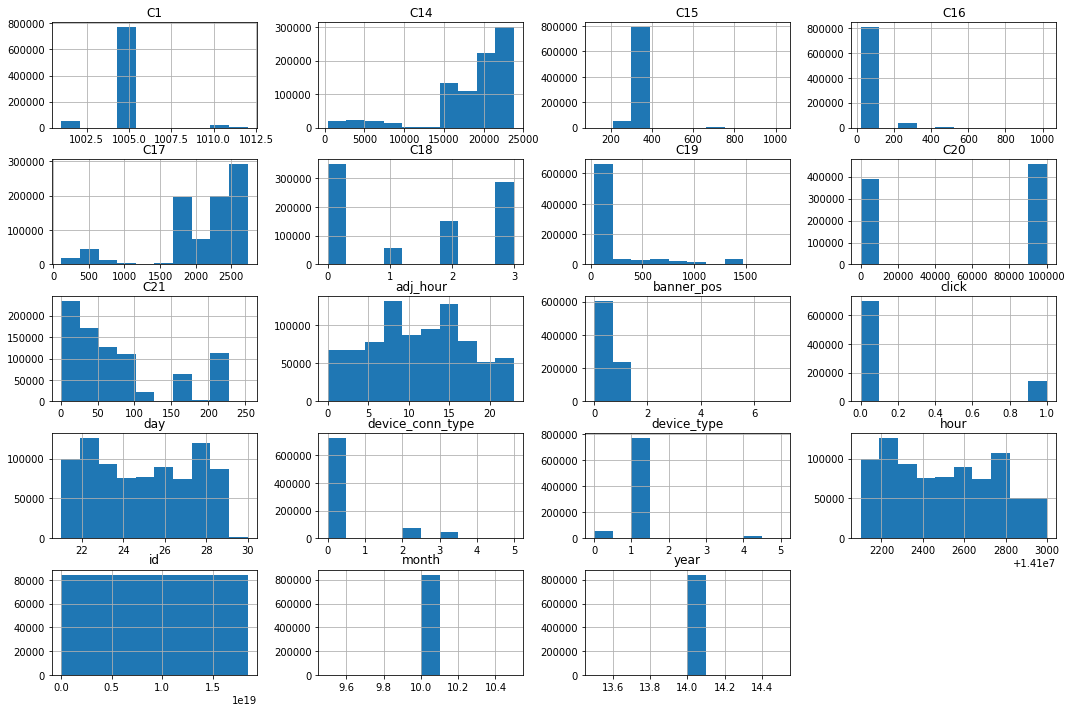

In [7]:
sampled_training.hist(figsize = (18,12))

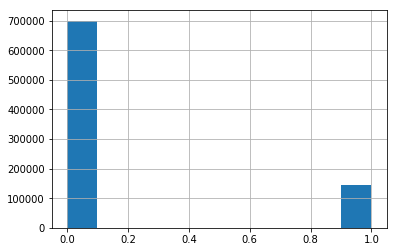

In [8]:
sampled_training['click'].hist()

In [9]:
# There is a very imbalanced sampled, which needs to be compensated for to prevent overfitting. 

In [10]:
sampled_test.columns = ['id', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']

In [11]:
#decompose year , month, day from hour
sampled_test['year'] = sampled_test['hour'] // 10**6
sampled_test['month'] = sampled_test['hour'] // 10**4 - sampled_test['year'] * 10**2
sampled_test['day'] = sampled_test['hour'] // 10**2 - sampled_test['year'] * 10**4 - sampled_test['month'] * 10**2
sampled_test['adj_hour'] = sampled_test['hour'] - sampled_test['year'] * 10**6 - sampled_test['month'] * 10**4 - sampled_test['day'] * 10**2

In [12]:
sampled_test.head()

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,year,month,day,adj_hour
0,635176803480460379,14103000,1002,0,85f751fd,c4e18dd6,50e219e0,27550a3c,7801e8d9,07d7df22,74a5ae5a,46f971c3,08ac11ab,0,0,23553,300,50,2699,0,163,-1,212,14,10,30,0
1,6360170755674123511,14103000,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,235dacaa,84ebbcd4,1,0,17614,320,50,1993,2,1063,-1,33,14,10,30,0
2,6372531204453459606,14103000,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,a99f214a,d5ac81e5,7fb42699,1,0,23726,320,50,2717,2,47,-1,23,14,10,30,0
3,6375797800199782003,14103000,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,e5354ca2,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79,14,10,30,0
4,638604204480092601,14103000,1005,0,7294ea0f,863fa89d,3e814130,ecad2386,7801e8d9,07d7df22,a99f214a,a9d89cf9,779d90c2,1,0,17239,320,50,1973,3,39,-1,23,14,10,30,0


In [13]:
X =  ['C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'adj_hour', 'day']
y = ['click']

In [14]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sampled_training[X], sampled_training[y], test_size=0.2, random_state=0)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [16]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

/home/vijay/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
clf = RandomForestClassifier()
clf.fit(X_train_res, y_train_res)
y_pred = clf.predict(X_val)
y_pred1 = clf.predict(X_test)

/home/vijay/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(y_val, y_pred)

array([[77815, 34277],
       [10454, 12415]])

In [21]:
confusion_matrix(y_test, y_pred1)

array([[97443, 42480],
       [13396, 15382]])

In [22]:
from sklearn.metrics import accuracy_score

In [24]:
accuracy_score(y_val, y_pred)

0.6685635109401975

In [25]:
accuracy_score(y_test, y_pred1)

0.6687867884600566

In [26]:
clf.feature_importances_

array([0.01321893, 0.01968607, 0.00978386, 0.04497082, 0.14654918,
       0.02607144, 0.02267963, 0.04844876, 0.02703389, 0.03250113,
       0.12060229, 0.04586826, 0.31764665, 0.12493909])

In [27]:
# month, year were removed because they had 0 predictive power

In [28]:
X_train_res1, y_train_res1 = sm.fit_sample(sampled_training[X], sampled_training[y])

/home/vijay/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
clf.fit(X_train_res1, y_train_res1)
y_pred = clf.predict(sampled_test[X])

In [33]:
y_pred_p = clf.predict_proba(sampled_test[X])

In [34]:
#save predictions
pd.DataFrame(y_pred_p).to_csv('predictions.csv')